In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import csv
import json
import pandas as pd


# use seaborn plotting defaults
# If this causes an error, you can comment it out.
import seaborn as sns
sns.set()


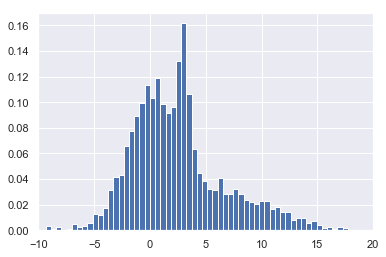

In [35]:

np.random.seed(2)
x = np.concatenate([np.random.normal(0, 2, 2000),
                    np.random.normal(5, 5, 2000),
                    np.random.normal(3, 0.5, 600)])
plt.hist(x, 80, normed=True)
plt.xlim(-10, 20);

In [66]:
x.shape

(4600, 1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


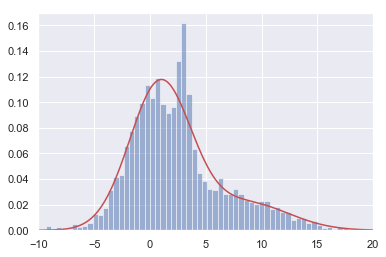

In [49]:
from sklearn.mixture import GaussianMixture as GMM
clf = GMM(2, max_iter=500, random_state=3)
x.shape = (x.shape[0],1)
clf = clf.fit(x)

xpdf = np.linspace(-10, 20, 1000)
xpdf.shape = (xpdf.shape[0],1)
# clf.score_samples(xpdf)
density = np.exp(clf.score_samples(xpdf))

plt.hist(x, 80, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
plt.xlim(-10, 20);

In [45]:
clf.means_

array([[-1.74282836],
       [ 8.05651456],
       [ 2.88362651],
       [-0.25003172]])

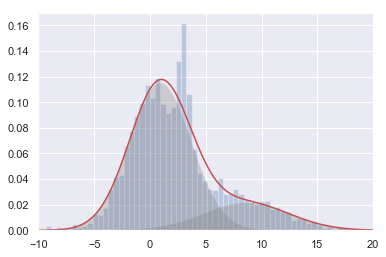

In [50]:
plt.hist(x, 80, normed=True, alpha=0.3)
plt.plot(xpdf, density, '-r')

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xlim(-10, 20);

## Data and preprocessing

In [2]:
with open('json/checkedtrips.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [4]:
import math
numBuckets=96
def toMinutesTime(t):
    realtime = t.hour*60+t.minute-200;
    if(realtime < 0):
        realtime+=1440
    return realtime//15

In [6]:
df2= df[["bikeid","duration", "start_formated", "end_formated","start_station", "end_station", "type"]]

df2["start_formated"]= pd.to_datetime(df2["start_formated"])
df2["end_formated"]= pd.to_datetime(df2["end_formated"])

typedic = {"full": 0, "empty": 1}
df2['type'] = df2['type'].apply(lambda x: typedic[x])

df2["start_bucket"] = df2["start_formated"].apply(toMinutesTime)
df2["end_bucket"] = df2["end_formated"].apply(toMinutesTime)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A 

In [14]:
df3 = df2[df2["duration"] != 0]
df3

,bikeid,duration,start_formated,end_formated,start_station,end_station,type,start_bucket,end_bucket
0,3d7411b67bb74fa5dae3bf00929de0e93b6640441e123b...,90690.0,2017-07-12 00:17:00,2017-07-13 01:28:00,6,32,1,83,88
1,98a68977816db353e8cb08eaff4e3371612966c57d4afc...,142770.0,2017-07-12 00:19:00,2017-07-13 15:58:00,28,1,1,83,50
2,11c10617d0c651e15a224f29ddccd39b777834546d2457...,126450.0,2017-07-12 00:24:00,2017-07-13 11:32:00,8,76,1,84,32
3,592d9655998836c88b0cc53787c6fd37e63c394c1b0364...,111000.0,2017-07-12 01:20:00,2017-07-13 08:10:00,14,8,1,88,19
4,7dd80633118de4a33357f864d8e36442278fca095d4840...,100410.0,2017-07-12 01:31:00,2017-07-13 05:25:00,76,22,1,88,8
5,cde7992ca2a3bde11bce750fa6e3bbed7aa87ea83677cd...,151293.0,2017-07-12 01:48:00,2017-07-13 19:49:00,7,8,1,89,65
6,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,124080.0,2017-07-12 01:49:00,2017-07-13 12:17:00,8,76,1,89,35
7,a10539d2dd36e2367b15e1724fab054677f286a13b262d...,81270.0,2017-07-12 02:15:00,2017-07-13 00:49:00,41,76,1,91,85
8,4a714a284c247bbdfcdf91af7cda917317fc22d0bed97d...,82470.0,2017-07-12 02:21:00,2017-07-13 01:16:00,8,21,1,92,87
9,d0ba39e04fe58d59b3747ac97e858e6eaf3c2fb3e1422d...,93990.0,2017-07-12 02:41:00,2017-07-13 04:48:00,77,32,1,93,5


In [15]:
X = df3[["type","duration","start_station", "end_station", "start_bucket", "end_bucket"]]
X = X[X["type"]==1]
# Z = X["duration"]
X = np.array(X[["duration"]])
# X = X[["duration"]]

In [16]:
X = X/60
X

array([[1511.5],
       [2379.5],
       [2107.5],
       ...,
       [ 792. ],
       [1364. ],
       [ 920.2]])

In [104]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

# X_scaled.sample(5)


,duration
12385,2.152444
15711,-0.494894
6548,-0.525341
1408,1.062453
556,2.390765


In [109]:
X = np.array(X_scaled)

In [285]:
def chunk (duration):
    return duration//15

In [288]:
Z = chunk(X)

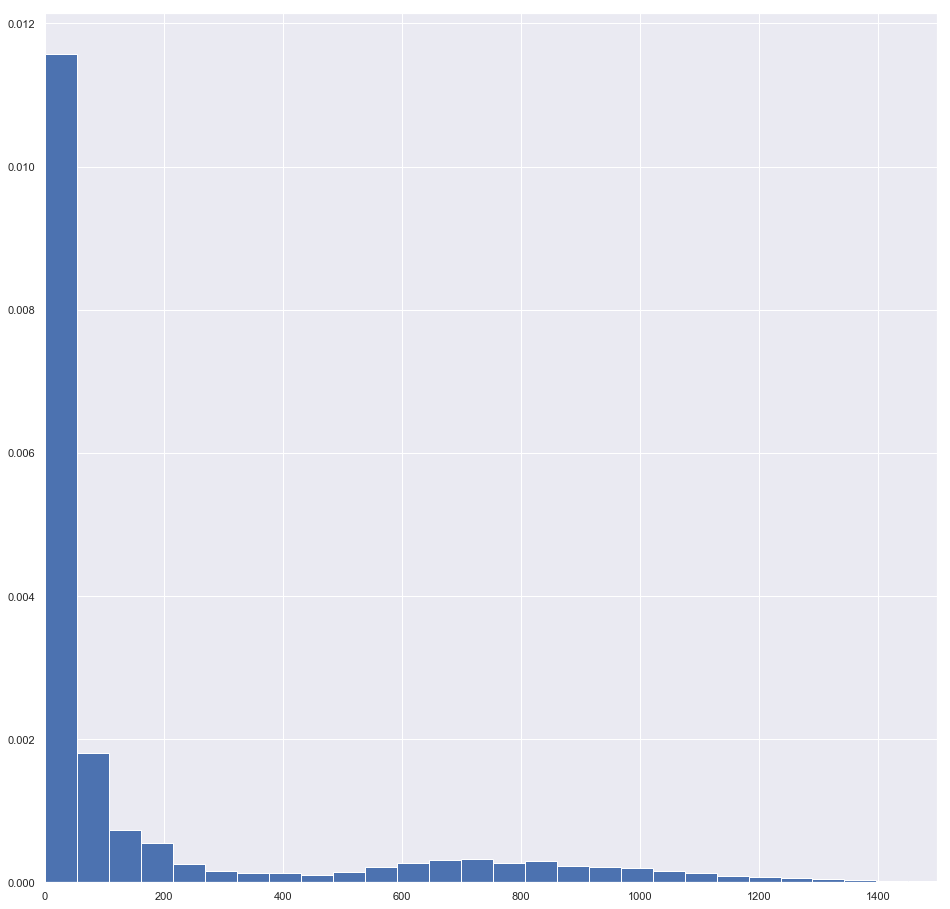

In [257]:
plt.figure(figsize=(16, 16))
plt.hist(X, 50, density=True)
# plt.plot(Z, color="black", lw=3)
# 
plt.xlim(-1, 1500);

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


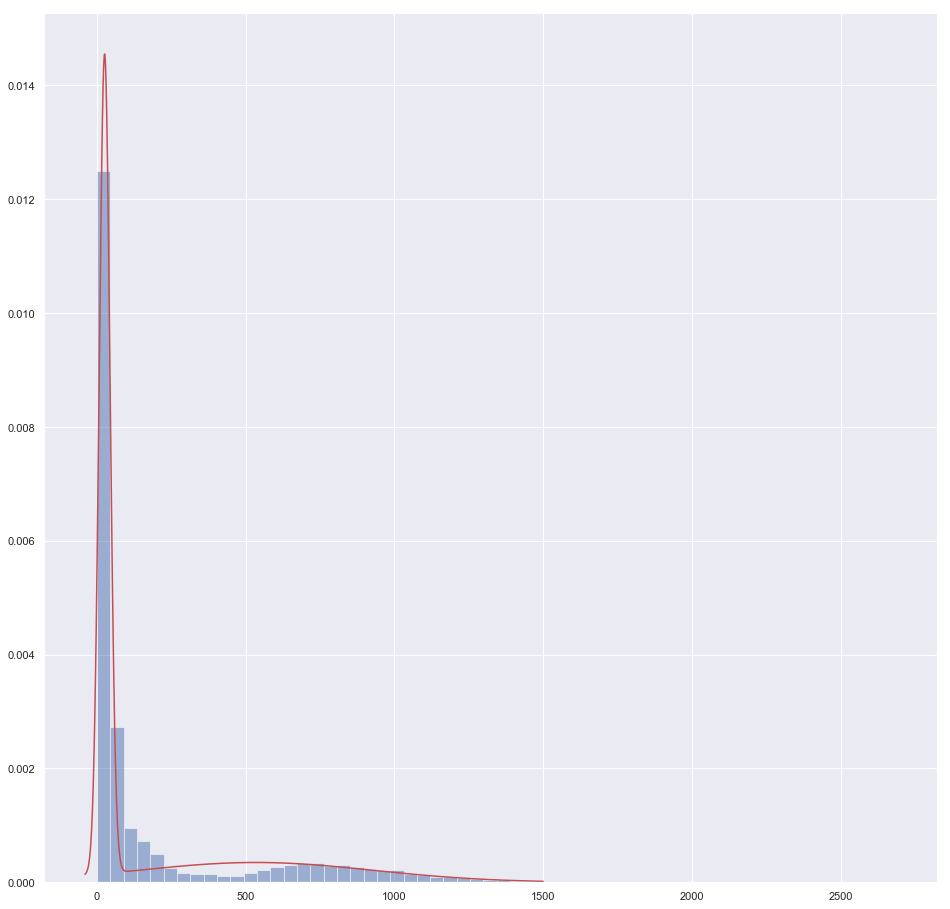

In [29]:
from sklearn.mixture import GaussianMixture as GMM
clf = GMM(2, max_iter=500, random_state=3, init_params = "kmeans")
X.shape = (X.shape[0],1)
clf = clf.fit(X)

xpdf = np.linspace(-40, 1500, 15000)
xpdf.shape = (xpdf.shape[0],1)
# clf.score_samples(xpdf)
density = np.exp(clf.score_samples(xpdf))

# figsize = (10,10)
plt.figure(figsize=(16, 16))
# plt.plot(X, color="black", lw=3)
plt.hist(X, 60, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
# plt.xlim(-1, 4);

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


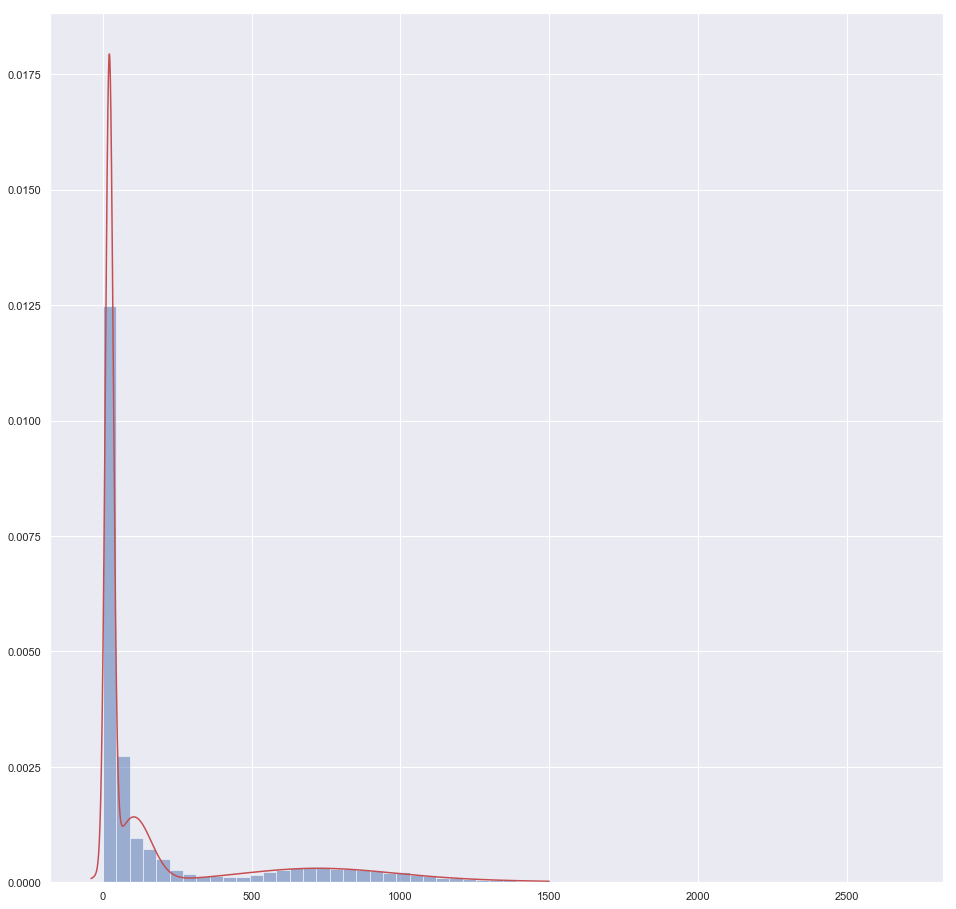

In [25]:
from sklearn.mixture import GaussianMixture as GMM
clf = GMM(4, max_iter=500, random_state=3, init_params = "kmeans")
X.shape = (X.shape[0],1)
clf = clf.fit(X)

xpdf = np.linspace(-40, 1500, 15000)
xpdf.shape = (xpdf.shape[0],1)
# clf.score_samples(xpdf)
density = np.exp(clf.score_samples(xpdf))

# figsize = (10,10)
plt.figure(figsize=(16, 16))
# plt.plot(X, color="black", lw=3)
plt.hist(X, 60, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
# plt.xlim(-1, 4);

### 2 clusters

In [24]:
clf.means_

array([[ 25.80159362],
       [533.76149981]])

### 4 clusters

In [26]:
clf.means_

array([[103.42120652],
       [912.51376206],
       [ 21.46695697],
       [706.59706112]])

NameError: name 'X' is not defined

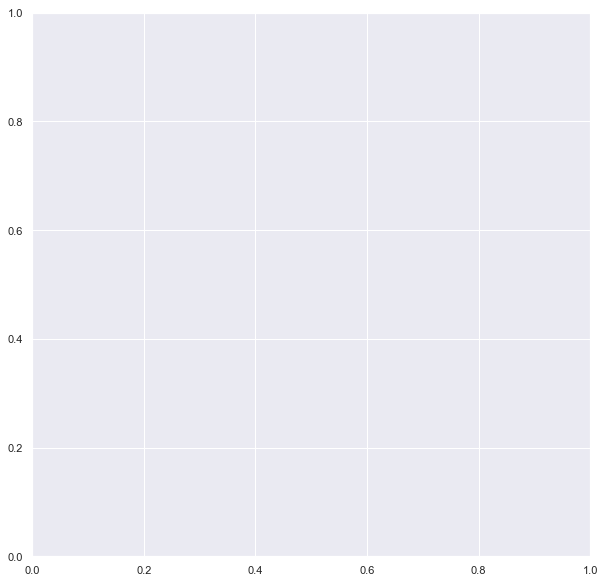

In [3]:
fig, ax = plt.subplots(figsize = (10,10))
(X).plot.kde()

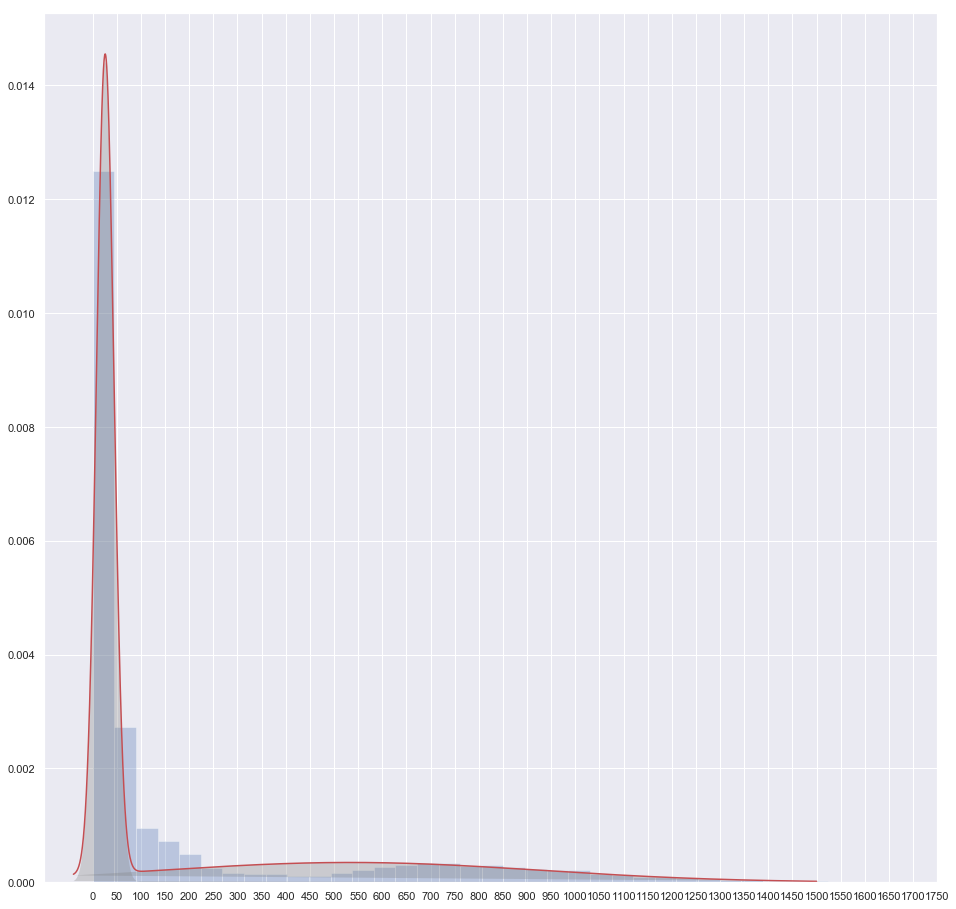

In [30]:
plt.figure(figsize=(16, 16))
plt.hist(X, 60, normed=True, alpha=0.3)
plt.plot(xpdf, density, '-r')

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
    
plt.xticks(np.arange(min(X), max(X)+1, 50))
plt.xlim(-100, 1750);

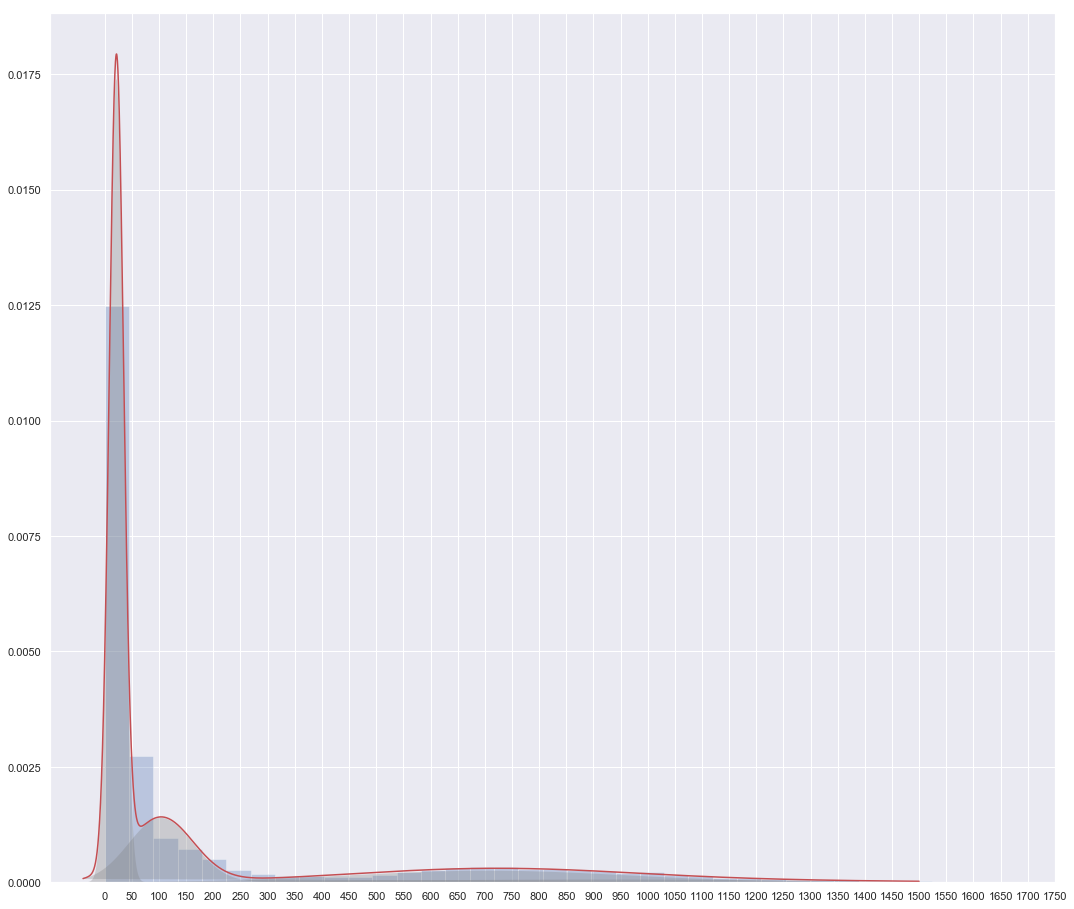

In [28]:
plt.figure(figsize=(18, 16))
plt.hist(X, 60, normed=True, alpha=0.3)
plt.plot(xpdf, density, '-r')

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0],
                                       np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)
plt.xticks(np.arange(min(X), max(X)+1, 50))
plt.xlim(-100, 1750);

In [240]:
print(clf.bic(X))
print(clf.aic(X))

217699.0839046833
217659.96818068402


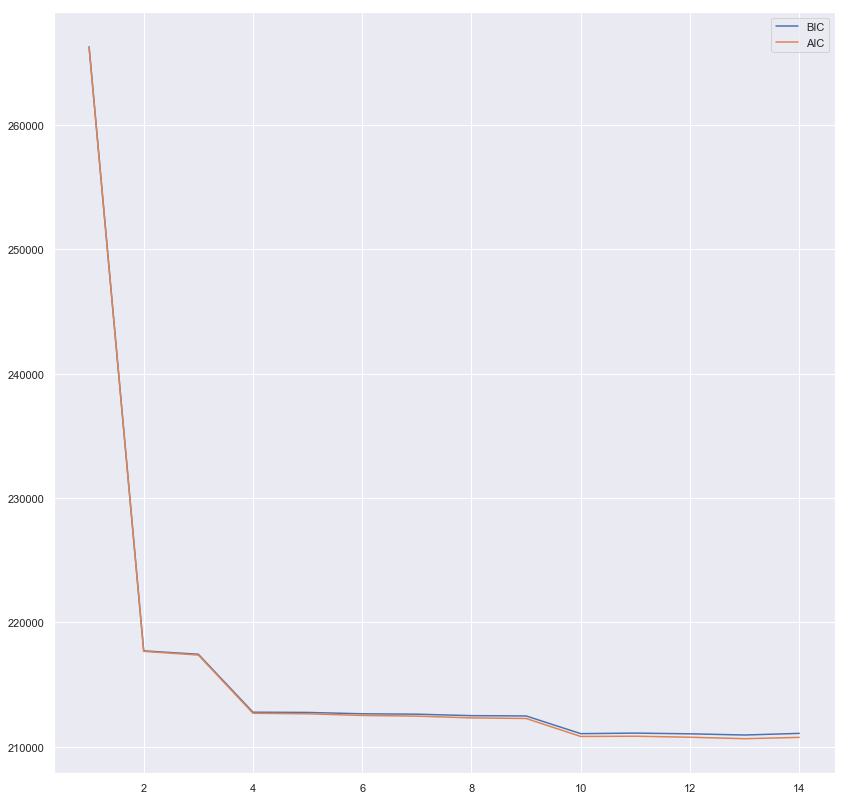

In [306]:
plt.figure(figsize=(14, 14))
n_estimators = np.arange(1, 15)
clfs = [GMM(n, max_iter=1000).fit(X) for n in n_estimators]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend();

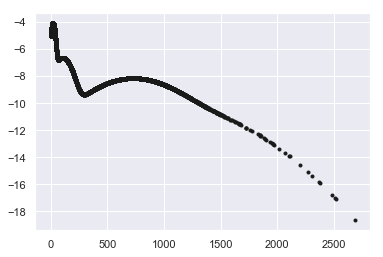

In [214]:
# y = x.copy()
log_likelihood = clf.score_samples(X)
plt.plot(X, log_likelihood, '.k');

In [311]:
clf.converged_

True

In [312]:
clf.covariances_

array([[[   356.03180062]],

       [[155537.52024997]]])